In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from matplotlib.pyplot import figure

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, roc_auc_score 
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")


import pickle

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df1 = pd.read_excel('C:/Users/lenovo/Downloads/deliveries_new.xlsx')

In [4]:
df1.shape

(179078, 21)

In [6]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
df1.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [5]:
df1.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [8]:
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [15]:
(df1.isnull().sum()/df1.match_id.count())*100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

# We have more than 95% null values in palyer dismissed, dismissal_kind and fielder.

In [16]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [17]:
df1.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,11,11,NaN,NaN,516,511,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


In [18]:
df1.batsman_runs.value_counts()

0    70845
1    67523
4    20392
2    11471
6     8170
3      587
5       79
7       11
Name: batsman_runs, dtype: int64

# There is data imbalance.

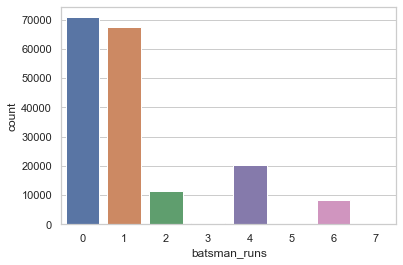

In [20]:
sns.countplot(df1["batsman_runs"])
plt.savefig("a.png")

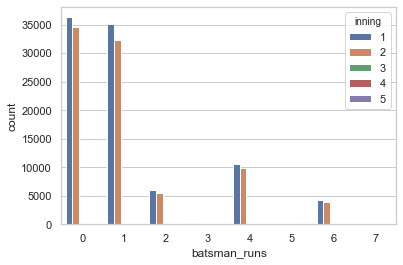

In [23]:
sns.countplot(x=df1.batsman_runs,hue=df1.inning)

In [30]:
round((df1['batsman_runs'].value_counts()/df1['batsman_runs'].count())*100,2)

0    39.56
1    37.71
4    11.39
2     6.41
6     4.56
3     0.33
5     0.04
7     0.01
Name: batsman_runs, dtype: float64

In [32]:
colors=['r','b','g','y','c','m']

Text(0.5, 1.0, 'Batsman who scored most runs in super over')

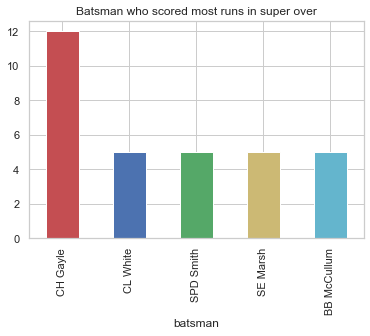

In [33]:
df1.groupby('batsman')['is_super_over'].sum().sort_values(ascending=False).head().plot(kind='bar',colors=colors)
plt.title('Batsman who scored most runs in super over')

Text(0.5, 1.0, 'Batsman who scored most runs against Royal challengers bangalore')

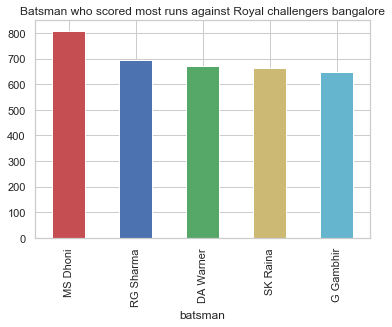

In [34]:
df1[(df1['bowling_team']=='Royal Challengers Bangalore')].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head().plot(kind='bar',colors=colors)
plt.title('Batsman who scored most runs against Royal challengers bangalore')

Text(0.5, 1.0, 'Batsman who scored most runs against JJ Bumrah')

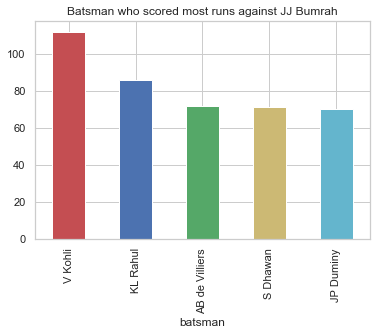

In [38]:
df1[df1['bowler'] == 'JJ Bumrah'].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head().plot(kind='bar',colors=colors)
plt.title('Batsman who scored most runs against JJ Bumrah')

Text(0.5, 1.0, 'Batsman who scored most runs against Mumbai indians and against Malinga')

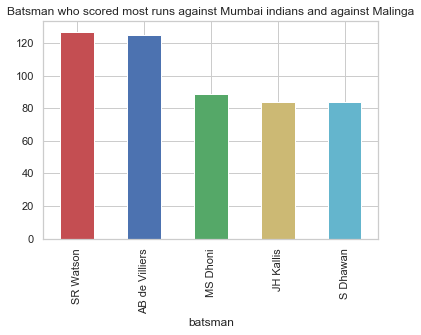

In [35]:
df1[(df1['bowling_team']=='Mumbai Indians') & (df1['bowler'] == 'SL Malinga')].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head().plot(kind='bar',colors=colors)
plt.title('Batsman who scored most runs against Mumbai indians and against Malinga')

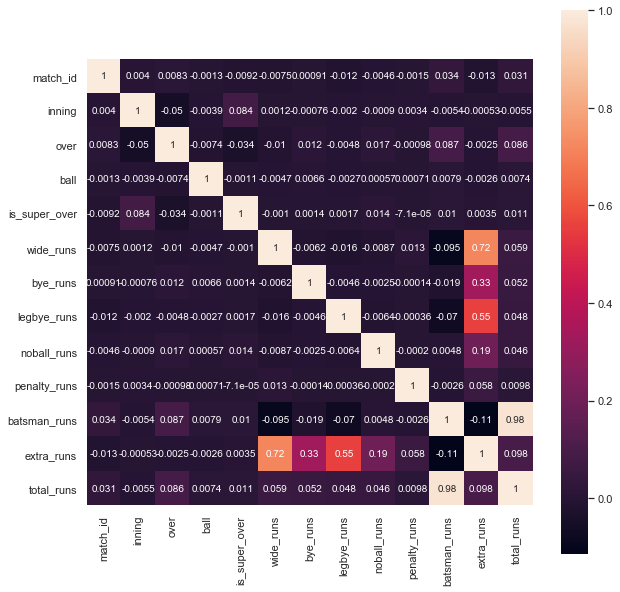

In [47]:
plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr(),square=True,annot=True)

In [49]:
df1[df1['batsman']=='S Dhawan']

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
14,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,1,S Dhawan,MC Henriques,TS Mills,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
18,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,5,S Dhawan,MC Henriques,TS Mills,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178610,11414,1,Delhi Capitals,Chennai Super Kings,4,1,S Dhawan,C Munro,Harbhajan Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178616,11414,1,Delhi Capitals,Chennai Super Kings,5,1,S Dhawan,C Munro,DL Chahar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178618,11414,1,Delhi Capitals,Chennai Super Kings,5,3,S Dhawan,C Munro,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178619,11414,1,Delhi Capitals,Chennai Super Kings,5,4,S Dhawan,C Munro,DL Chahar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [95]:
df1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

In [94]:
df1.groupby(by=['batsman'])['match_id'].nunique().sort_values(ascending=False).head(5)

batsman
SK Raina      189
RG Sharma     182
RV Uthappa    170
MS Dhoni      170
V Kohli       169
Name: match_id, dtype: int64

In [98]:
df1.groupby(by=['batsman','match_id'])['match_id'].count().sort_values(ascending=False).head(5)

batsman      match_id
BB McCullum  60          77
MK Pandey    171         74
AM Rahane    311         72
DA Warner    200         72
SE Marsh     97          72
Name: match_id, dtype: int64

In [110]:
df=df1.sample(n=30000,replace=False)

In [111]:
df.shape

(30000, 21)

In [112]:
df.batsman_runs.value_counts()

0    11884
1    11335
4     3535
2     1814
6     1301
3      116
5       13
7        2
Name: batsman_runs, dtype: int64

In [115]:
df.drop(['match_id','total_runs'],axis=1,inplace=True)

In [125]:
df.drop(['player_dismissed','dismissal_kind','fielder'],axis=1,inplace=True)

In [127]:
x=df.drop('batsman_runs',axis=1)
y=df.batsman_runs

In [128]:
from sklearn import preprocessing

In [129]:
lab = preprocessing.LabelEncoder()

In [130]:
lab_x = x.apply(lab.fit_transform)

In [132]:
lab_x.dtypes

inning           int64
batting_team     int32
bowling_team     int32
over             int64
ball             int64
batsman          int32
non_striker      int32
bowler           int32
is_super_over    int64
wide_runs        int64
bye_runs         int64
legbye_runs      int64
noball_runs      int64
penalty_runs     int64
extra_runs       int64
dtype: object

In [133]:
std = preprocessing.StandardScaler()

In [134]:
std_x = std.fit_transform(lab_x)

In [137]:
std_x = pd.DataFrame(std_x,columns=lab_x.columns)

In [139]:
std_x.head(2)

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs
0,-0.968575,0.224380,-1.571922,1.735721,0.213284,0.496107,-0.375751,-0.980741,-0.020821,-0.156255,-0.04427,-0.10685,-0.057703,0.0,-0.193394
1,-0.968575,1.126512,0.229742,1.032938,-1.443223,0.206422,1.476361,-0.709085,-0.020821,-0.156255,-0.04427,-0.10685,-0.057703,0.0,-0.193394


In [140]:
x_train, x_test, y_train, y_test = train_test_split(std_x,y,test_size=0.3,random_state=42)

In [141]:
import xgboost as xgb

In [143]:
from xgboost.sklearn import XGBClassifier
xg=XGBClassifier()
xg_model = xg.fit(x_train,y_train)
xg_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [144]:
xg_pred = xg_model.predict(x_test)
print(classification_report(xg_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52      3344
           1       0.74      0.45      0.56      5654
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2

    accuracy                           0.48      9000
   macro avg       0.18      0.14      0.15      9000
weighted avg       0.65      0.48      0.54      9000



In [152]:
sm = SMOTE(random_state=42,k_neighbors=1)

In [153]:
x,y = sm.fit_resample(std_x,y)

In [155]:
x.shape

(95072, 15)

In [156]:
y.value_counts()

7    11884
6    11884
5    11884
4    11884
3    11884
2    11884
1    11884
0    11884
Name: batsman_runs, dtype: int64

In [162]:
rf = RandomForestClassifier()
rfe = RFE(rf, 8)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False False False False
 False False False]
[1 1 1 1 1 1 1 1 7 3 6 4 5 8 2]


In [161]:
x_train.columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'extra_runs'],
      dtype='object')

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [167]:
x_train.drop(['is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'extra_runs'],axis=1,inplace=True)

In [175]:
x_test.drop(['is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'extra_runs'],axis=1,inplace=True)

In [176]:
print(x_train.shape)
print(x_test.shape)

(66550, 8)
(28522, 8)


In [169]:
rf= RandomForestClassifier()
rf_model = rf.fit(x_train,y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [178]:
rf_pred = rf_model.predict(x_test)
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48      3735
           1       0.51      0.47      0.49      3828
           2       0.89      0.92      0.90      3553
           3       0.99      1.00      0.99      3570
           4       0.77      0.83      0.80      3243
           5       1.00      1.00      1.00      3573
           6       0.93      0.95      0.94      3524
           7       1.00      1.00      1.00      3496

    accuracy                           0.82     28522
   macro avg       0.82      0.83      0.83     28522
weighted avg       0.82      0.82      0.82     28522



In [179]:
dt = DecisionTreeClassifier()

In [180]:
dt_model = dt.fit(x_train,y_train)
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [181]:
dt_pred = dt_model.predict(x_test)
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.40      0.41      0.40      3486
           1       0.36      0.39      0.38      3250
           2       0.77      0.73      0.75      3838
           3       0.98      0.96      0.97      3657
           4       0.62      0.59      0.60      3620
           5       1.00      1.00      1.00      3582
           6       0.81      0.81      0.81      3592
           7       1.00      1.00      1.00      3497

    accuracy                           0.74     28522
   macro avg       0.74      0.74      0.74     28522
weighted avg       0.75      0.74      0.74     28522



In [182]:
bg = BaggingClassifier()

In [183]:
bg_model = bg.fit(x_train,y_train)
bg_model

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [184]:
bg_pred = bg.predict(x_test)
print(classification_report(bg_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.42      0.46      4172
           1       0.41      0.44      0.42      3349
           2       0.83      0.83      0.83      3642
           3       0.99      0.98      0.98      3624
           4       0.66      0.72      0.69      3173
           5       1.00      1.00      1.00      3587
           6       0.86      0.89      0.88      3478
           7       1.00      1.00      1.00      3497

    accuracy                           0.78     28522
   macro avg       0.78      0.78      0.78     28522
weighted avg       0.78      0.78      0.78     28522



In [188]:
gr = GradientBoostingClassifier()

In [189]:
gr_model = gr.fit(x_train,y_train)
gr_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [190]:
gr_pred = gr_model.predict(x_test)
print(classification_report(gr_pred,y_test))

              precision    recall  f1-score   support

           0       0.38      0.43      0.40      3176
           1       0.58      0.39      0.47      5253
           2       0.35      0.48      0.40      2666
           3       0.89      0.63      0.74      5116
           4       0.23      0.41      0.30      1997
           5       1.00      0.97      0.98      3681
           6       0.42      0.49      0.45      3134
           7       1.00      1.00      1.00      3499

    accuracy                           0.61     28522
   macro avg       0.61      0.60      0.59     28522
weighted avg       0.66      0.61      0.62     28522



In [191]:
knn = KNeighborsClassifier()

In [192]:
knn_model = knn.fit(x_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [193]:
knn_pred = knn_model.predict(x_test)
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.28      0.45      0.35      2213
           1       0.27      0.48      0.34      2026
           2       0.94      0.72      0.82      4763
           3       1.00      0.96      0.98      3765
           4       0.79      0.66      0.72      4182
           5       1.00      0.99      1.00      3606
           6       0.98      0.79      0.87      4468
           7       1.00      1.00      1.00      3499

    accuracy                           0.78     28522
   macro avg       0.78      0.76      0.76     28522
weighted avg       0.85      0.78      0.81     28522



In [194]:
RF_gini = RandomForestClassifier(n_estimators=51,criterion='gini',random_state=0 )
RF_entropy = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0 )

#ADA Boosted
RF_gini_ADABoosted = AdaBoostClassifier(base_estimator=RF_gini,n_estimators=50)
RF_entropy_ADABoosted = AdaBoostClassifier(base_estimator=RF_entropy,n_estimators=50)

In [196]:
rf_gini = RF_gini.fit(x_train,y_train)
rf_gini

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [197]:
rf_gini_pred = rf_gini.predict(x_test)
print(classification_report(rf_gini_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      3854
           1       0.49      0.47      0.48      3686
           2       0.88      0.92      0.90      3537
           3       0.99      1.00      0.99      3578
           4       0.77      0.83      0.80      3273
           5       1.00      1.00      1.00      3573
           6       0.93      0.95      0.94      3526
           7       1.00      1.00      1.00      3495

    accuracy                           0.82     28522
   macro avg       0.82      0.83      0.82     28522
weighted avg       0.82      0.82      0.82     28522



In [198]:
rf_entropy = RF_entropy.fit(x_train,y_train)
rf_entropy

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [199]:
rf_entropy_pred = rf_entropy.predict(x_test)
print(classification_report(rf_entropy_pred,y_test))

              precision    recall  f1-score   support

           0       0.51      0.46      0.48      3892
           1       0.48      0.47      0.47      3615
           2       0.89      0.92      0.90      3561
           3       0.99      1.00      0.99      3576
           4       0.78      0.83      0.80      3286
           5       1.00      1.00      1.00      3573
           6       0.93      0.95      0.94      3524
           7       1.00      1.00      1.00      3495

    accuracy                           0.82     28522
   macro avg       0.82      0.83      0.82     28522
weighted avg       0.82      0.82      0.82     28522



In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
gd = GridSearchCV(rf,param_grid=param_grid,cv=5,n_jobs=5,verbose=True)
gd_model = gd.fit(x_train,y_train)
gd_model

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  4.1min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed: 25.8min
